In [1]:
!pip install -U tensorflow_datasets


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


In [3]:

# 60,000 images for training data and 10,000 images for testing data

# Using TensorFlow Datasets API (get Fashion MNIST data)

data, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFMUR10/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteFMUR10/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
train_data = data['train']
test_data = data["test"]

In [5]:
print(len(train_data))
print(len(test_data))

60000
10000


In [6]:
print(metadata)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_path=PosixGPath('/tmp/tmpsa45qth9tfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao a

In [7]:
print(metadata.features["label"].names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [9]:
len(labels)

10

In [10]:
len(train_data)

60000

In [11]:
len(test_data)

10000

In [12]:
# Each pixel value in image data is between 0 and 255. Need to make it between 0 and 1 to make the model work

def normalize(images, label):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, label

In [13]:
# map function applies normalize function

train_data = train_data.map(normalize)
test_data = test_data.map(normalize)

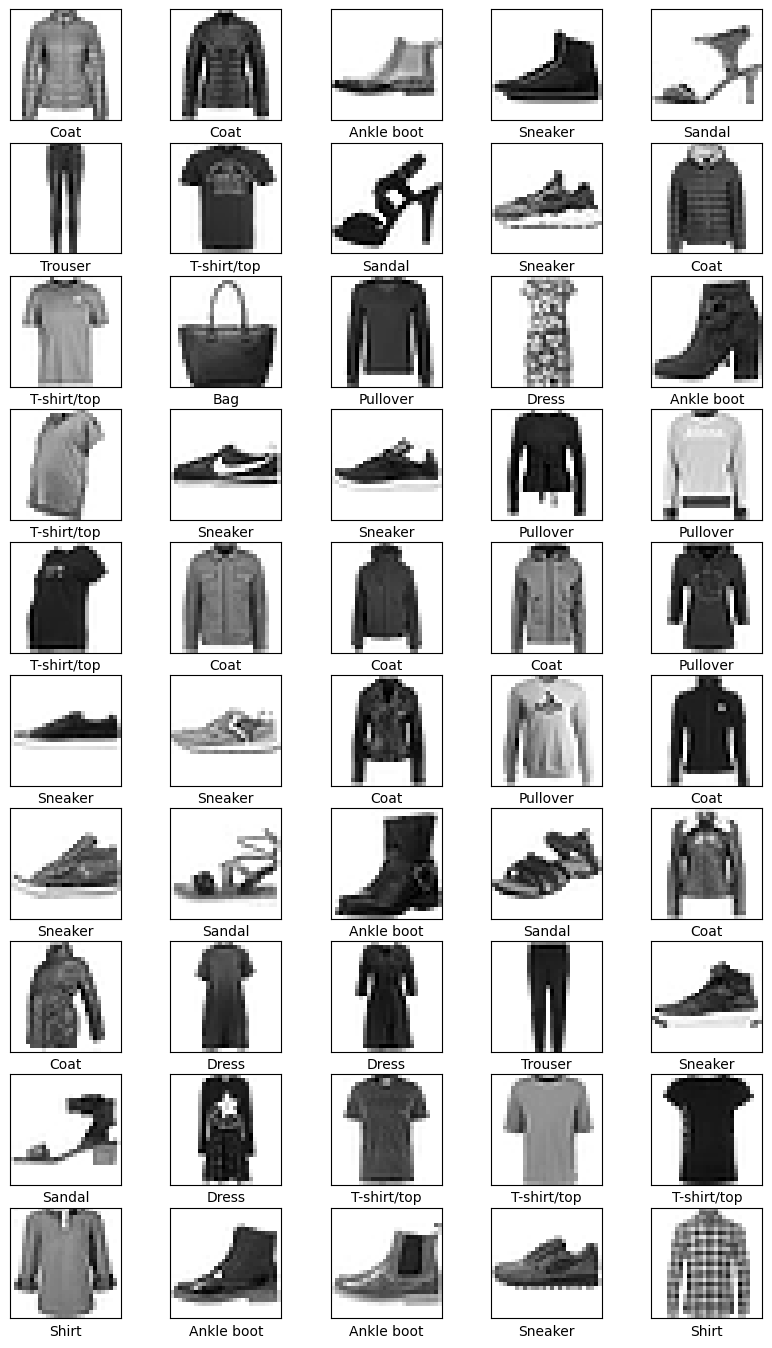

In [14]:
# showing the first 50 images

plt.figure(figsize=(10,17))
x = 0
for (i, l) in test_data.take(50):
  i = i.numpy().reshape((28, 28))
  plt.subplot(10, 5, x+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(i, cmap=plt.cm.binary)
  plt.xlabel(labels[l])
  x += 1

plt.show()

In [45]:
# Building the CNN model

model = tf.keras.Sequential()

# This layer is creating 64 convoluted images and uses padding.
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding="same", activation=tf.nn.relu, input_shape=(28,28,1)))

# This layer reduces the size of 64 outputs with a stride of 1
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=1))

# This layer takes these 64 input images and produces output with 128 images
model.add(tf.keras.layers.Conv2D(128, (3, 3), padding="same", activation=tf.nn.relu))

# This layer reduces the size of 128 outputs with a stride of 2
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=2))

# This layer flattens the data
model.add(tf.keras.layers.Flatten())

# This Dense layer uses 128 neurons
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

# This Dense layer uses 512 neurons to improve accuracy
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))

# This layer outputs 10 units, 1 for each label and uses softmax activation function for probability distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))



In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [22]:
train_data = train_data.shuffle(60000).batch(32)

In [23]:
test_data = test_data.batch(32)


In [26]:
model.fit(train_data, epochs = 15, steps_per_epoch=math.ceil(60000/32))


Epoch 1/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0361 - accuracy: 0.9869
Epoch 2/15
1875/1875 [==============================] - 16s 7ms/step - loss: 0.0349 - accuracy: 0.9881
Epoch 3/15
1875/1875 [==============================] - 16s 7ms/step - loss: 0.0300 - accuracy: 0.9898
Epoch 4/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0253 - accuracy: 0.9912
Epoch 5/15
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0259 - accuracy: 0.9917
Epoch 6/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 7/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0231 - accuracy: 0.9923
Epoch 8/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0212 - accuracy: 0.9933
Epoch 9/15
1875/1875 [==============================] - 15s 7ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 10/15
1875/1875 [==============================] - 15s 7ms/step - l

In [27]:
# Trained the model for 900,000 examples in total (60,000 * 15)

# Achieved accuracy of over 99% with training data

In [28]:
model.evaluate(test_data, steps=(10000/32))

312/312 [==============================] - 5s 13ms/step - loss: 0.6900 - accuracy: 0.9201


[0.6899681687355042, 0.9200999736785889]

In [29]:
# Accuracy on testing data is over 92%


In [30]:
for i1, l1 in test_data.take(1):
  i1 = i1.numpy()
  l1 = l1.numpy()
  predictions = model.predict(i1)

1/1 [==============================] - 0s 117ms/step


In [31]:
predictions[0]

array([1.5427872e-12, 4.9019768e-12, 6.4018008e-07, 4.3065405e-09,
       9.9942529e-01, 2.9289801e-16, 5.7414797e-04, 2.1128971e-14,
       1.0571101e-12, 2.9467210e-12], dtype=float32)

In [32]:
np.argmax(predictions[0])

4

In [33]:
l1[0]

# The prediction matches the test data

4

In [34]:
labels[4]

'Coat'

In [35]:
# Scrolling up and looking at the first image from before, it is a coat, so model is correct


In [36]:
print(np.argmax(predictions[4]))
print(l1[4])


5
5


In [38]:
labels[5]
# The fifth picture, displayed in the plot above, is a sandal, so the model is correct

'Sandal'

In [39]:
# From TensorFlow documentation

def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

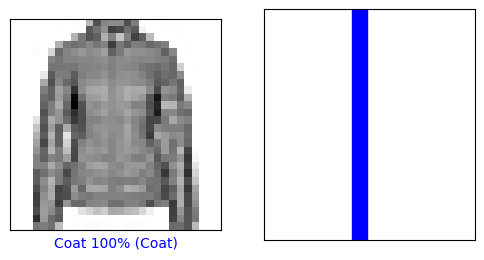

In [40]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, l1, i1)
plt.subplot(1,2,2)
plot_value_array(i, predictions, l1)

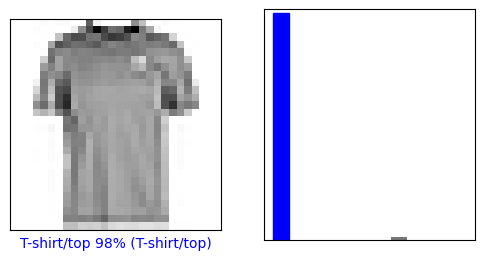

In [41]:
i = 10
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, l1, i1)
plt.subplot(1,2,2)
plot_value_array(i, predictions, l1)

In [43]:
len(predictions)

32

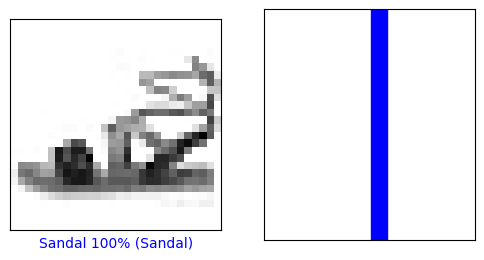

In [44]:
i = 31
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, l1, i1)
plt.subplot(1,2,2)
plot_value_array(i, predictions, l1)